In [ ]:
import pandas as pd
import numpy as np
import sklearn
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.metrics import mean_squared_error as mse
from datetime import datetime
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
from pandas import datetime
def parser(x):
	return datetime.strptime(x, '%Y-%b')
 
#shampoo = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#shampoo.index = shampoo.index.to_period('M')
#shampoo.head(10)

In [ ]:
data = pd.read_csv('Inf14-22.csv')
data.head()


,Month,Inflation
0,1914-Jan,2.04%
1,1914-Feb,1.02%
2,1914-Mar,1.02%
3,1914-Apr,0.00%
4,1914-May,2.06%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      1305 non-null   object
 1   Inflation  1305 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [ ]:
len(data)

1305

In [ ]:
data.isna().sum()

Month        0
Inflation    0
dtype: int64

In [ ]:
data['Month']=pd.to_datetime(data['Month'])

In [ ]:
data['Inflation']=data['Inflation'].str.replace('%','').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      1305 non-null   datetime64[ns]
 1   Inflation  1305 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


In [ ]:
data['Inflation'].describe(percentiles=[.1,.25,.5,.75,.90])

count    1305.00000
mean        3.26623
std         4.96064
min       -15.79000
10%        -0.74000
25%         1.19000
50%         2.63000
75%         4.65000
90%         9.39000
max        23.67000
Name: Inflation, dtype: float64

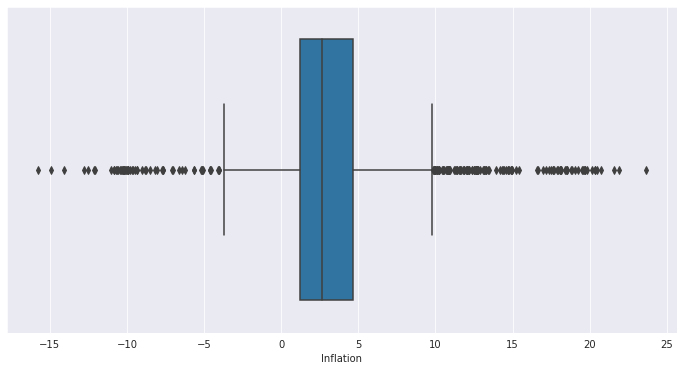

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Inflation'])
plt.show()


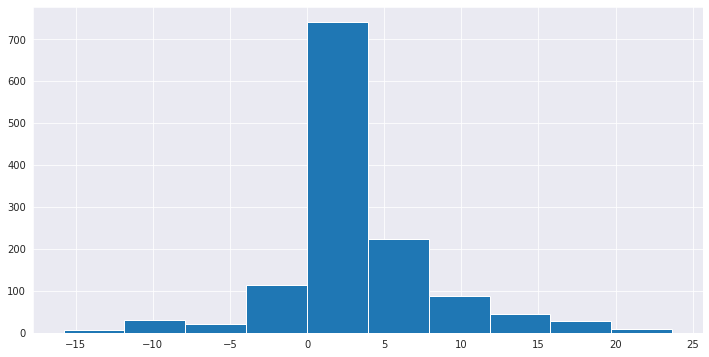

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(data['Inflation'])
plt.show()

In [ ]:
data.head()


,Month,Inflation
0,1914-01-01,2.04
1,1914-02-01,1.02
2,1914-03-01,1.02
3,1914-04-01,0.00
4,1914-05-01,2.06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      1305 non-null   datetime64[ns]
 1   Inflation  1305 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


In [ ]:
data.columns
data = data.set_index(['Month'])

In [ ]:
data.head()

,Inflation
Month,
1914-01-01,2.04
1914-02-01,1.02
1914-03-01,1.02
1914-04-01,0.00
1914-05-01,2.06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 1914-01-01 to 2022-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflation  1305 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


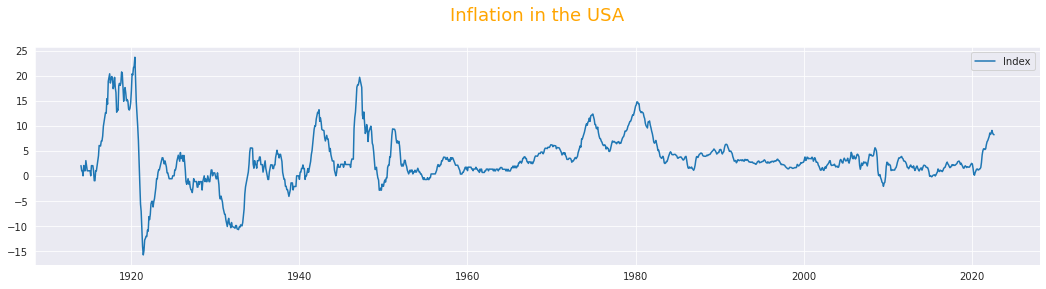

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(data,label='Index')
plt.legend(loc='best')
plt.title('Inflation in the USA\n',fontdict={'fontsize':18, 'fontweight':5, 'color':'Orange' })
plt.show()

In [ ]:
data['Inflation'].isna().sum()

0

Additive Seasonal Decomposition

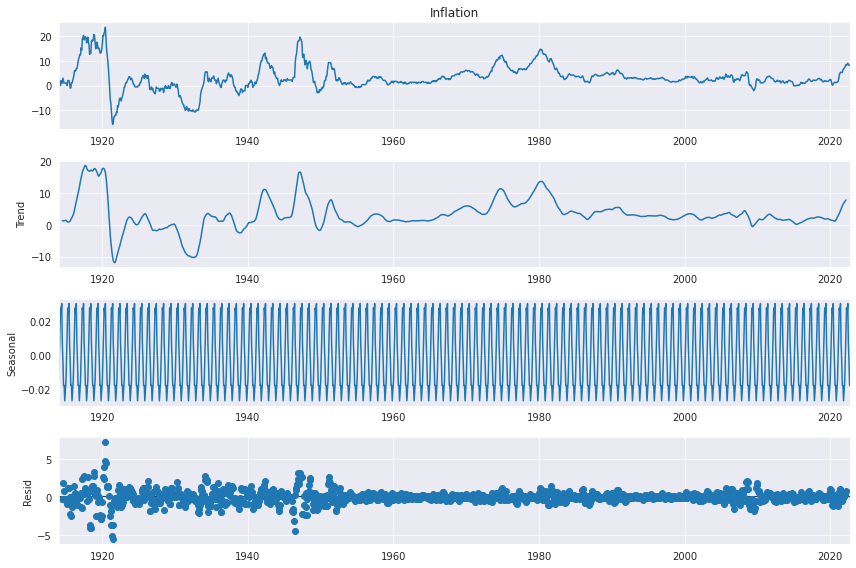

In [ ]:
from pylab import rcParams
from scipy.fftpack import fftfreq # Fast Fourier Transform 
# Fourier analysis is a method for expressing a function as a sum of periodical components, 
# and for recovering the signal form those components
import statsmodels.api as sm
rcParams['figure.figsize']= 12,8
decomposition = sm.tsa.seasonal_decompose(data['Inflation'], model='additive', period=12)
fig=decomposition.plot()

plt.show()

In [ ]:
#decomposition = sm.tsa.seasonal_decompose(data['Inflation'], model='additive', period=12)
#Multiplicative method does not applicable to negative or 0 values. Do not forget to try it futher! 

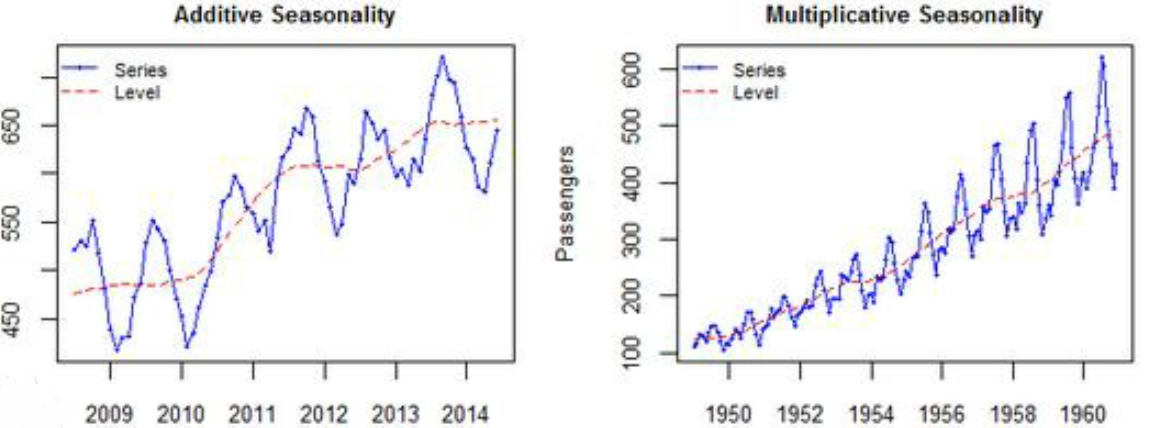

In [ ]:
len(data[data['Inflation']<=0])

194

Multiplicative Seasonal Decomposition:

In [ ]:
#decomposition = sm.tsa.seasonal_decompose(dataM['Inflation'], model='multiplicative', period=12)

In [ ]:
train_len=1300
train=data[:train_len]
test=data[train_len:]



We built a Time-Series Model.
To make the series stationary, we need to transform transformation and differencing. 

Check whether the time series is stationary: 


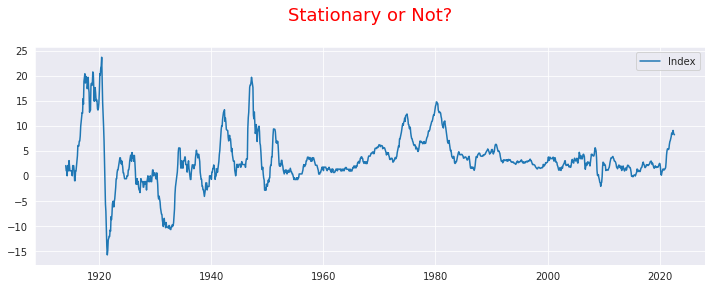

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data,label='Index')
plt.legend(loc='best')
plt.title('Stationary or Not?\n',fontdict={'fontsize':18, 'fontweight':5, 'color':'Red' })
plt.show()

**Conditions of Stationarity: **


 1) The mean /expected value stays constant throughout the time periods

2) The Standard deviation and Variance stay constant throughout the time periods

3) The is no seasonality in the data

Augmented Dickey-Fuller (ADF) Test: 

Hypothesis testing if the time series stationary or not. 
 - Null Hypothesis: the time series is stationary
 - Alternative Hypothisis: the time series is not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_data = adfuller(data['Inflation'])
print(adf_data)
print('ADF Statistic =',round(adf_data[0],2))
print('Critical Value at 5% =', round(adf_data[4]['5%'],2))
print('p value =', adf_data[1])

(-5.803371897324333, 4.575859223301434e-07, 16, 1288, {'1%': -3.435437251933509, '5%': -2.863786592704128, '10%': -2.567966103183712}, 2492.708577702506)
ADF Statistic = -5.8
Critical Value at 5% = -2.86
p value = 4.575859223301434e-07


P value < 0.05. It means the time series is stationary. 

Box Cox Transformation to make variance constant 

Differencing Method:

  4  12  4  5  6 
      4 12  4  5  6

TS = Null, 8, -8, 3, 1 

So, we transform (differencing) TS to stationary. 

*   List item
*   List item



We predict new value - transformed values! - then 

reverse transformed values to original data. 




In [ ]:
from scipy.stats import boxcox

In [ ]:
#data_bc = pd.Series(boxcox(data['Inflation'], lmbda = 0),index=data.index)
# For this transformation lambda should be positive
#plt.figure(figsize=(12,4))
#plt.plot(data_bc,label='After BoxCox Transformation')
#plt.legend(loc='best')
#plt.title('After BoxCox Transformation\n',fontdict={'fontsize':18, 'fontweight':5, 'color':'Red' })
#plt.show()


In [ ]:
mod = ar_select_order(train, maxlag=30)

print(mod.ar_lags)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [ ]:
test

,Inflation
Month,
2022-05-01,8.58
2022-06-01,9.06
2022-07-01,8.53
2022-08-01,8.26
2022-09-01,8.20


In [ ]:
test = test.values
#model = AutoReg(train, lags=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
model = AutoReg(train, lags=[1,2,3,4,5,6,7,8,9,10])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
	print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = (mse(test, predictions)**0.5)
print('Test RMSE: %.3f' % rmse)


predicted=8.221997, actual=8.580000
predicted=8.155293, actual=9.060000
predicted=8.146335, actual=8.530000
predicted=7.968983, actual=8.260000
predicted=7.784854, actual=8.200000
Test MSE: 0.520


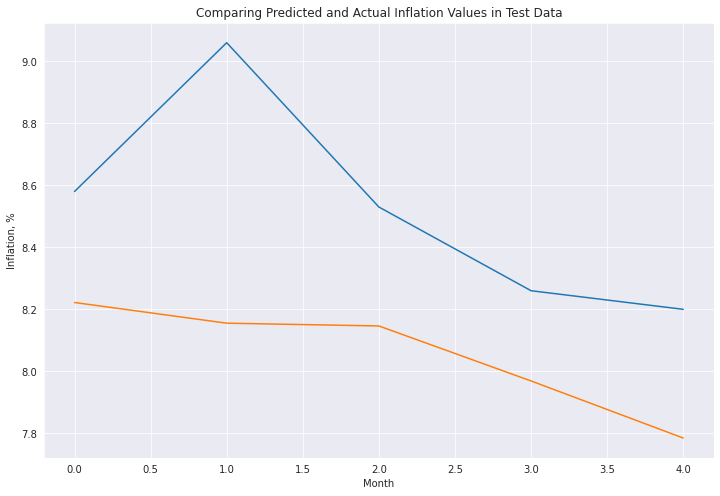

In [ ]:
# plot results
plt.plot(test)
plt.plot(predictions.values)
plt.title('Comparing Predicted and Actual Inflation Values in Test Data')
plt.ylabel('Inflation, %')
plt.xlabel('Month')
plt.show()